<a href="https://colab.research.google.com/github/preetdadga/Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
data = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
data.shape

(891, 12)

In [87]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [88]:
data = data.drop('Cabin',axis=1)

In [95]:
data['Age'].fillna(data['Age'].median(), inplace=True)

/tmp/ipython-input-913469570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [96]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-4247733614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [97]:
data = pd.get_dummies(data,columns=['Sex', 'Embarked'])

In [98]:
scaler = StandardScaler()
data[['Age','Fare']] = scaler.fit_transform(data[['Age','Fare']])

In [99]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Age', ylabel='Count'>

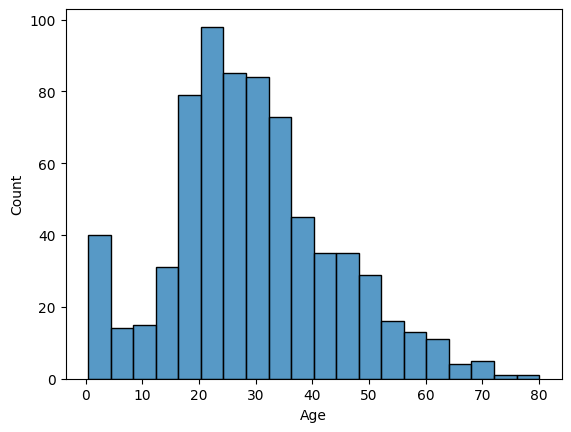

In [89]:
sns.histplot(data['Age'])

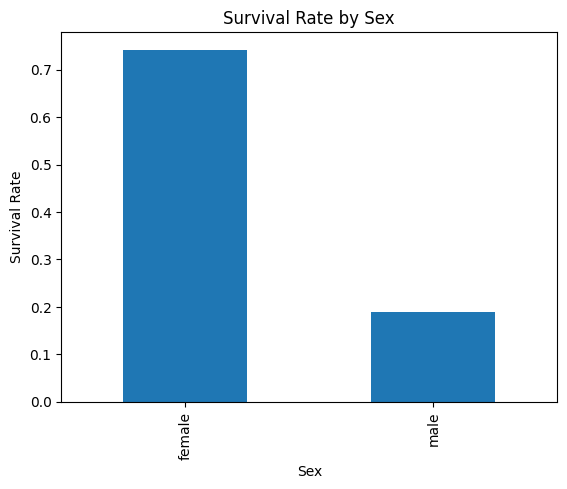

In [90]:
data.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

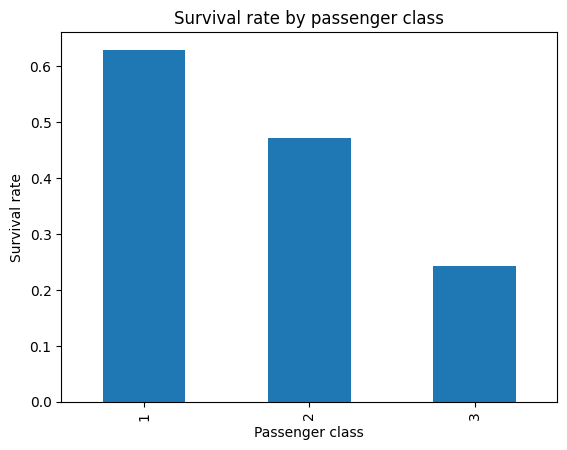

In [91]:
data.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.ylabel('Survival rate')
plt.xlabel('Passenger class')
plt.title('Survival rate by passenger class')
plt.show()

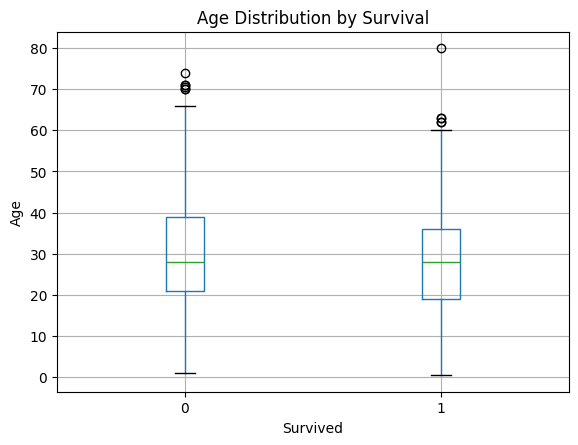

In [92]:
data.boxplot(column='Age', by='Survived')
plt.title('Age Distribution by Survival')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

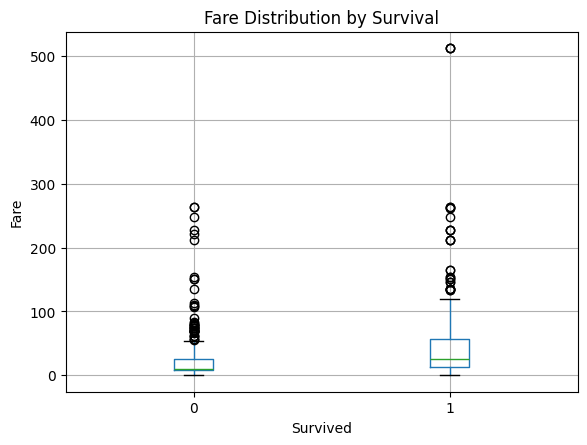

In [93]:
data.boxplot(column='Fare', by='Survived')
plt.title('Fare Distribution by Survival')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


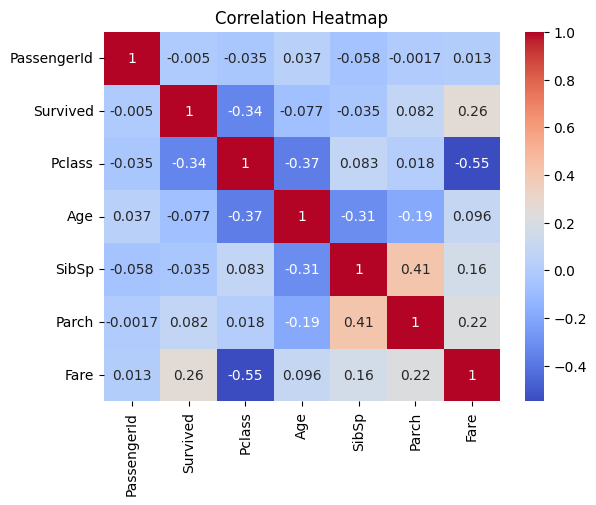

In [94]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [100]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


In [102]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

<Axes: xlabel='FamilySize'>

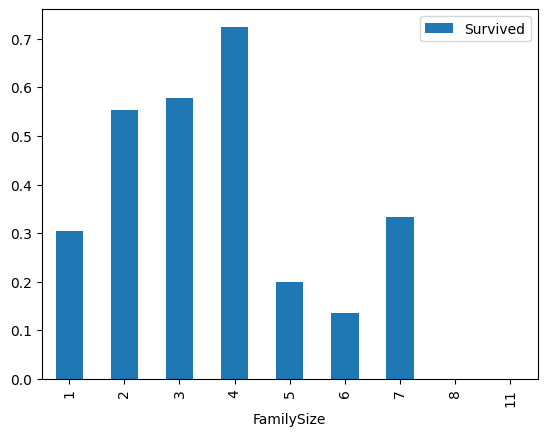

In [103]:
data.groupby('FamilySize')[['Survived']].mean().plot(kind='bar')

In [104]:
data.drop(columns=['SibSp', 'Parch'], inplace=True)

In [105]:
X = pd.DataFrame(data.drop(columns=['Survived']))
y = pd.DataFrame(data['Survived'])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression**

In [107]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [108]:
y_pred = lm.predict(X_test)

In [109]:
mse = mean_squared_error(y_test, y_pred)
mse

0.13548021878920852

In [110]:
lm.score(X_test,y_test)

0.4413228197908583

In [111]:
r2_score(y_test, y_pred)

0.4413228197908583

# **Logistic Regression**

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
lr = LogisticRegression()


In [115]:
param_grid = {
    'C':  [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300,1000]
}

In [116]:
grid = GridSearchCV(
    estimator = lr,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1
)


In [117]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [118]:
best_lr = grid.best_estimator_

print(grid.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [119]:
y_pred_lr = best_lr.predict(X_test)

In [120]:
accuracy_score(y_test, y_pred_lr)

0.8044692737430168

In [121]:
train_acc = accuracy_score(y_train, best_lr.predict(X_train))
test_acc  = accuracy_score(y_test,  best_lr.predict(X_test))

print(train_acc, test_acc)


0.8019662921348315 0.8044692737430168


In [122]:
from sklearn.metrics import roc_auc_score

y_prob = best_lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)


np.float64(0.8785070785070784)

# **Polynomial Regression**

In [123]:
from sklearn.preprocessing import PolynomialFeatures

In [124]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [125]:
grid.fit(X_train_poly, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [126]:
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test_poly)

In [127]:
accuracy_score(y_test, y_pred)

0.8100558659217877